In [762]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regex as re

In [763]:
file_path = 'chart.csv'
df = pd.read_csv(file_path)
df.head()

,action_type,author_name,author_title,author_member_duration,message,message_type,time_in_seconds,timestamp
0,add_chat_item,Mr. ShadowAnt,Member,1095,:_peek::_peek::_peek:,text_message,0.489,1725591613855922
1,add_chat_item,K1t3,Member,365,:_WWW::_AAA::_HHH:,text_message,0.978,1725591614300783
2,add_chat_item,Abyss,NaN,0,WAH,text_message,5.188,1725591618516444
3,add_chat_item,Michael,Member,1095,:_WWW::_AAA::_HHH:,text_message,8.393,1725591621699499
4,add_chat_item,Ichigo,NaN,0,:face-red-heart-shape:,text_message,12.633,1725591625942520


In [764]:
def recursive_replace(pattern, replacement, text):
    regex = re.compile(pattern)
    previous_text = None

    while previous_text != text:
        previous_text = text
        text = regex.sub(replacement, text)

    return text.strip()

In [765]:
with open('filter.txt', 'r', encoding='utf8') as f:
    filter_words = [word.strip() for word in f.readlines()]
pattern = re.compile(r'\b(' + '|'.join(filter_words) +
                    r')\b|(:[^:]+:)|(\(.*?\)[^\w\s]*)|(^\@\w+\s$)|(^\?+$)|\p{S}|\p{P}|\p{C}', re.IGNORECASE)
messages = df['message'].apply(
    lambda x:  recursive_replace(pattern, '', x)).replace('', np.nan).dropna()
messages.nunique()

5880

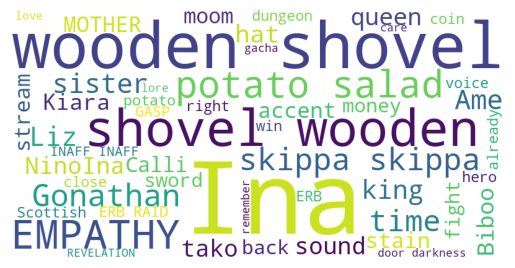

In [766]:
text = ' '.join(messages)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, min_word_length=3).generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

with open('msg.log', 'w', encoding='utf8') as f:
    for message in messages:
        if not len(message.strip()):
            continue
        f.write(f'{message}\n')